Tensor Flow 365DS


In [ ]:
import tensorflow as tf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
observations=1000
xs=np.random.uniform(-10,10,size=(observations,1))
zs=np.random.uniform(-10,10,size=(observations,1))

inputs=np.column_stack((xs,zs))
#random input data in matrix form
print(inputs.shape)

(1000, 2)


In [ ]:
#creating targets we will aim at
noise=np.random.uniform(-1,1,(observations,1))
targets=2*xs-3*zs+5+noise
print(targets.shape)

(1000, 1)


In [ ]:
#initial variables
init_range=0.1
weights=np.random.uniform(-init_range,init_range,size=(2,1))
biases=np.random.uniform(-init_range,init_range,size=(2,1))
print(weights)
print(biases)

[[ 0.03133324]
 [-0.0421733 ]]
[[-0.09001233]
 [ 0.00224367]]


In [ ]:
#set learning rate
learning_rate=0.02

In [ ]:
#train the model
for i in range(100):
  outputs=np.dot(inputs,weights)+biases
  deltas=outputs-targets
  loss=np.sum(deltas**2)/2/observations
  print(loss)

  deltas_scaled=deltas/observations
  weights=weights-learning_rate*np.dot(inputs.T,deltas_scaled)
  biases=biases-learning_rate*np.sum(deltas_scaled)

ValueError: ignored

In [ ]:
observations=1000
xs=np.random.uniform(-10,10,size=(observations,1))
zs=np.random.uniform(-10,10,size=(observations,1))

generated_inputs=np.column_stack((xs,zs))

noise=np.random.uniform(-1,1,(observations,1))
generated_targets=2*xs-3*zs+5+noise
#save it
np.savez('TF_intro',inputs=generated_inputs,targets=generated_targets)

In [ ]:
training_data=np.load('TF_intro.npz')

In [ ]:
input_size=2
output_size=1

model=tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])
model.compile(optimizer='sgd',loss='mean_squared_error')

model.fit(training_data['inputs'],training_data['targets'],epochs=100,verbose=2)

Epoch 1/100
32/32 - 1s - loss: 33.7116 - 617ms/epoch - 19ms/step
Epoch 2/100
32/32 - 0s - loss: 4.5067 - 71ms/epoch - 2ms/step
Epoch 3/100
32/32 - 0s - loss: 1.4911 - 70ms/epoch - 2ms/step
Epoch 4/100
32/32 - 0s - loss: 0.6482 - 62ms/epoch - 2ms/step
Epoch 5/100
32/32 - 0s - loss: 0.4157 - 62ms/epoch - 2ms/step
Epoch 6/100
32/32 - 0s - loss: 0.3522 - 61ms/epoch - 2ms/step
Epoch 7/100
32/32 - 0s - loss: 0.3397 - 64ms/epoch - 2ms/step
Epoch 8/100
32/32 - 0s - loss: 0.3339 - 64ms/epoch - 2ms/step
Epoch 9/100
32/32 - 0s - loss: 0.3330 - 62ms/epoch - 2ms/step
Epoch 10/100
32/32 - 0s - loss: 0.3310 - 58ms/epoch - 2ms/step
Epoch 11/100
32/32 - 0s - loss: 0.3403 - 61ms/epoch - 2ms/step
Epoch 12/100
32/32 - 0s - loss: 0.3342 - 57ms/epoch - 2ms/step
Epoch 13/100
32/32 - 0s - loss: 0.3329 - 60ms/epoch - 2ms/step
Epoch 14/100
32/32 - 0s - loss: 0.3428 - 59ms/epoch - 2ms/step
Epoch 15/100
32/32 - 0s - loss: 0.3284 - 61ms/epoch - 2ms/step
Epoch 16/100
32/32 - 0s - loss: 0.3297 - 64ms/epoch - 2ms/ste

In [ ]:
#weights and biases
model.layers[0].get_weights()

[array([[ 1.9707177],
        [-2.9894025]], dtype=float32),
 array([5.0218954], dtype=float32)]

In [ ]:
#predict values
model.predict_on_batch(training_data['inputs'])

array([[  3.0469425 ],
       [ 12.250401  ],
       [ 11.357677  ],
       [  0.6334009 ],
       [ -5.2090406 ],
       [-24.27032   ],
       [  0.12230206],
       [ -4.0719843 ],
       [  5.6979833 ],
       [-11.476783  ],
       [ 44.21186   ],
       [ -7.7290783 ],
       [ 13.448794  ],
       [ -4.1662273 ],
       [ -3.061716  ],
       [ 19.343534  ],
       [  2.030384  ],
       [ -9.089141  ],
       [  5.026107  ],
       [-30.30679   ],
       [ 35.213882  ],
       [  1.6509829 ],
       [ 25.193932  ],
       [  9.142102  ],
       [-16.584423  ],
       [ 16.881144  ],
       [-18.542747  ],
       [-17.343445  ],
       [ -2.8432217 ],
       [  2.5189867 ],
       [ 18.952934  ],
       [ 18.330133  ],
       [ 21.783493  ],
       [ 26.438251  ],
       [-26.275375  ],
       [-34.621284  ],
       [-14.725703  ],
       [ -1.0090265 ],
       [ -2.7321463 ],
       [  1.4435072 ],
       [  8.507228  ],
       [ -6.643777  ],
       [-29.457054  ],
       [-16

In [ ]:
training_data['targets'].round(1)

array([[  3.2],
       [ 11.7],
       [ 12.1],
       [  1.3],
       [ -4.9],
       [-25.1],
       [ -0.4],
       [ -3.4],
       [  4.6],
       [-11.3],
       [ 43.5],
       [ -7.8],
       [ 12.7],
       [ -3.8],
       [ -2.4],
       [ 18.5],
       [  1.1],
       [ -8.5],
       [  5.8],
       [-30. ],
       [ 36.2],
       [  1.6],
       [ 25.9],
       [  9.2],
       [-16.1],
       [ 17.4],
       [-17.9],
       [-17.5],
       [ -2. ],
       [  2.8],
       [ 19.5],
       [ 17.6],
       [ 21.9],
       [ 25.7],
       [-25.8],
       [-34.9],
       [-14.2],
       [ -0.8],
       [ -2.6],
       [  0.9],
       [  9.5],
       [ -6.8],
       [-29.6],
       [-17.1],
       [-11.1],
       [  2.7],
       [ 49.9],
       [ 33.7],
       [ 36.3],
       [  6. ],
       [-29.5],
       [ -0.9],
       [ 29.1],
       [ 26.4],
       [  3.4],
       [ 22.8],
       [ 20.2],
       [ -5.5],
       [-22.3],
       [-30.9],
       [ 13. ],
       [ -8.2],
       [

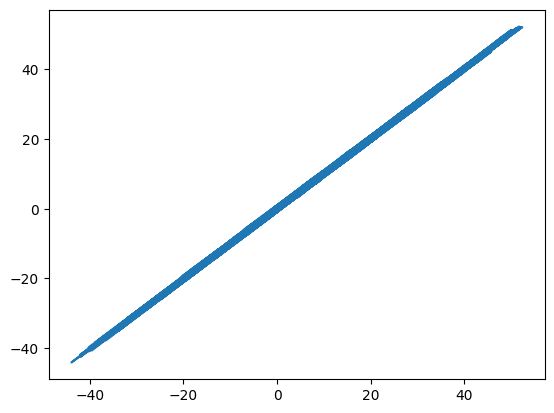

In [ ]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.show()

MNIST


In [ ]:
import tensorflow_datasets as tfds

In [ ]:
mnist_dataset,mnist_info=tfds.load(name='mnist',with_info=True,as_supervised=True)
mnist_dataset

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


{'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [ ]:
mnist_info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1.incompleteJP6XUK',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",

In [ ]:
mnist_train,mnist_test=mnist_dataset['train'],mnist_dataset['test']

num_validation_samples=0.1*mnist_info.splits['train'].num_examples
num_validation_samples=tf.cast(num_validation_samples,tf.int64)

num_test_samples=mnist_info.splits['test'].num_examples
num_test_samples=tf.cast(num_test_samples,tf.int64)

def scale(image,label):
  image=tf.cast(image,tf.float32)
  image /=255.
  return image,label

scaled_train_and_validation_data=mnist_train.map(scale)
test_data=mnist_test.map(scale)

BUFFER_SIZE=10000

shuffled__train_and_validation_data=scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data=shuffled__train_and_validation_data.take(num_validation_samples)
train_data=shuffled__train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE=100

train_data=train_data.batch(BATCH_SIZE)
validation_data=validation_data.batch(num_validation_samples)
test_data=test_data.batch(num_test_samples)

validation_inputs,validations_targets=next(iter(validation_data))

In [ ]:
input_size=784
hidden_layer_size=200
output_size=10

model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')


])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#training

num_epochs=5

model.fit(train_data,epochs=num_epochs,validation_data=(validation_inputs,validations_targets),verbose=2)

Epoch 1/5
540/540 - 7s - loss: 0.2730 - accuracy: 0.9225 - val_loss: 0.1359 - val_accuracy: 0.9585 - 7s/epoch - 14ms/step
Epoch 2/5
540/540 - 5s - loss: 0.1068 - accuracy: 0.9678 - val_loss: 0.0839 - val_accuracy: 0.9735 - 5s/epoch - 10ms/step
Epoch 3/5
540/540 - 6s - loss: 0.0699 - accuracy: 0.9789 - val_loss: 0.0646 - val_accuracy: 0.9800 - 6s/epoch - 10ms/step
Epoch 4/5
540/540 - 6s - loss: 0.0508 - accuracy: 0.9843 - val_loss: 0.0542 - val_accuracy: 0.9838 - 6s/epoch - 11ms/step
Epoch 5/5
540/540 - 6s - loss: 0.0379 - accuracy: 0.9882 - val_loss: 0.0551 - val_accuracy: 0.9843 - 6s/epoch - 10ms/step


In [ ]:
test_loss,test_accuracy=model.evaluate(test_data)

1/1 [==============================] - 2s 2s/step - loss: 0.0729 - accuracy: 0.9773


audiobook case study

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
raw_csv_data=np.loadtxt('Audiobooks_data.csv',delimiter=',')
unscaled_inputs_all=raw_csv_data[:,1:-1]
targets_all=raw_csv_data[:,-1]


In [ ]:
unscaled_inputs_all

array([[1620.  , 1620.  ,   19.73, ..., 1603.8 ,    5.  ,   92.  ],
       [2160.  , 2160.  ,    5.33, ...,    0.  ,    0.  ,    0.  ],
       [2160.  , 2160.  ,    5.33, ...,    0.  ,    0.  ,  388.  ],
       ...,
       [2160.  , 2160.  ,    6.14, ...,    0.  ,    0.  ,    0.  ],
       [1620.  , 1620.  ,    5.33, ...,  615.6 ,    0.  ,   90.  ],
       [1674.  , 3348.  ,    5.33, ...,    0.  ,    0.  ,    0.  ]])

In [ ]:
targets_all

array([0., 0., 0., ..., 0., 0., 1.])

In [ ]:
num_one_targets=int(np.sum(targets_all))
zero_targets_counter=0
indices_to_remove=[]

for i in range(targets_all.shape[0]):
  if targets_all[i]==0:
    zero_targets_counter+=1
    if zero_targets_counter>num_one_targets:
      indices_to_remove.append(i)
unscaled_inputs_equal_priors=np.delete(unscaled_inputs_all,indices_to_remove,axis=0)
targets_equal_priors=np.delete(targets_all,indices_to_remove,axis=0)

In [ ]:
#scale the inputs
scaled_inputs=preprocessing.scale(unscaled_inputs_equal_priors)

In [ ]:
#shuffle the data
shuffled_indices=np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs=scaled_inputs[shuffled_indices]
shuffled_targets=targets_equal_priors[shuffled_indices]

In [ ]:
#train test split
samples_count=(shuffled_inputs.shape[0])

train_samples_count=int(0.8*samples_count)
validation_samples_count=int(0.1*samples_count)
test_samples_count=samples_count-train_samples_count-validation_samples_count

train_inputs=shuffled_inputs[:train_samples_count]
train_targets=shuffled_targets[:train_samples_count]

validation_inputs=shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets=shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

test_inputs=shuffled_inputs[validation_samples_count+train_samples_count:]
test_targets=shuffled_targets[validation_samples_count+train_samples_count:]

print(train_samples_count,validation_samples_count,test_samples_count)

3579 447 448


In [ ]:
np.savez('Audiobooks_data_train',inputs=train_inputs,targets=train_targets)
np.savez('Audiobooks_data_validation',inputs=validation_inputs,targets=validation_targets)
np.savez('Audiobooks_data_test',inputs=test_inputs,targets=test_targets)

In [ ]:
#data is preprocessed

In [ ]:
npz=np.load('Audiobooks_data_train.npz')

train_inputs=npz['inputs'].astype(np.float)
train_targets=npz['targets'].astype(np.int)

npz=np.load('Audiobooks_data_validation.npz')
validation_inputs,validations_targets=npz['inputs'].astype(np.float),npz['targets'].astype(np.int)

npz=np.load('Audiobooks_data_test.npz')
test_inputs,test_targets=npz['inputs'].astype(np.float),npz['targets'].astype(np.int)


<ipython-input-27-2edcea2a5df1>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_inputs=npz['inputs'].astype(np.float)
<ipython-input-27-2edcea2a5df1>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_targets=np

In [ ]:
input_size=10
hidden_layer_size=50
output_size=2

model=tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')


])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

batch_size=100
max_epochs=100

model.fit(train_inputs,
          train_targets,
          batch_size=batch_size,
          epochs=max_epochs,
          validation_data=(validation_inputs,validation_targets),
          verbose=2)

Epoch 1/100
36/36 - 2s - loss: 0.6104 - accuracy: 0.6527 - val_loss: 0.5168 - val_accuracy: 0.7338 - 2s/epoch - 55ms/step
Epoch 2/100
36/36 - 0s - loss: 0.4722 - accuracy: 0.7605 - val_loss: 0.4513 - val_accuracy: 0.7562 - 210ms/epoch - 6ms/step
Epoch 3/100
36/36 - 0s - loss: 0.4181 - accuracy: 0.7843 - val_loss: 0.4185 - val_accuracy: 0.7606 - 187ms/epoch - 5ms/step
Epoch 4/100
36/36 - 0s - loss: 0.3916 - accuracy: 0.7930 - val_loss: 0.4015 - val_accuracy: 0.7763 - 174ms/epoch - 5ms/step
Epoch 5/100
36/36 - 0s - loss: 0.3754 - accuracy: 0.8075 - val_loss: 0.3964 - val_accuracy: 0.7740 - 240ms/epoch - 7ms/step
Epoch 6/100
36/36 - 0s - loss: 0.3658 - accuracy: 0.8016 - val_loss: 0.3882 - val_accuracy: 0.7740 - 339ms/epoch - 9ms/step
Epoch 7/100
36/36 - 0s - loss: 0.3567 - accuracy: 0.8072 - val_loss: 0.3817 - val_accuracy: 0.7763 - 293ms/epoch - 8ms/step
Epoch 8/100
36/36 - 0s - loss: 0.3487 - accuracy: 0.8164 - val_loss: 0.3774 - val_accuracy: 0.7830 - 190ms/epoch - 5ms/step
Epoch 9/10

In [ ]:
#model is overfit since the epochs have reached till maximum


In [ ]:
input_size=10
hidden_layer_size=50
output_size=2

model=tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')


])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

batch_size=100
max_epochs=100
early_stopping=tf.keras.callbacks.EarlyStopping(patience=2)
model.fit(train_inputs,
          train_targets,
          batch_size=batch_size,
          epochs=max_epochs,
          callbacks=[early_stopping],
          validation_data=(validation_inputs,validation_targets),
          verbose=2)

Epoch 1/100
36/36 - 4s - loss: 0.6518 - accuracy: 0.6234 - val_loss: 0.5560 - val_accuracy: 0.7338 - 4s/epoch - 102ms/step
Epoch 2/100
36/36 - 0s - loss: 0.4992 - accuracy: 0.7522 - val_loss: 0.4730 - val_accuracy: 0.7629 - 433ms/epoch - 12ms/step
Epoch 3/100
36/36 - 0s - loss: 0.4326 - accuracy: 0.7726 - val_loss: 0.4321 - val_accuracy: 0.7673 - 181ms/epoch - 5ms/step
Epoch 4/100
36/36 - 0s - loss: 0.3982 - accuracy: 0.7930 - val_loss: 0.4139 - val_accuracy: 0.7651 - 167ms/epoch - 5ms/step
Epoch 5/100
36/36 - 0s - loss: 0.3782 - accuracy: 0.8016 - val_loss: 0.4000 - val_accuracy: 0.7830 - 191ms/epoch - 5ms/step
Epoch 6/100
36/36 - 0s - loss: 0.3651 - accuracy: 0.8086 - val_loss: 0.3935 - val_accuracy: 0.7808 - 174ms/epoch - 5ms/step
Epoch 7/100
36/36 - 0s - loss: 0.3552 - accuracy: 0.8128 - val_loss: 0.3898 - val_accuracy: 0.7763 - 166ms/epoch - 5ms/step
Epoch 8/100
36/36 - 0s - loss: 0.3488 - accuracy: 0.8131 - val_loss: 0.3847 - val_accuracy: 0.7852 - 187ms/epoch - 5ms/step
Epoch 9/

In [ ]:
test_loss,test_accuracy=model.evaluate(test_inputs,test_targets)

14/14 [==============================] - 0s 2ms/step - loss: 0.3405 - accuracy: 0.8259
